<a href="https://colab.research.google.com/github/athulrj02/TwiPipeline/blob/main/DA%7CCA_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Athul Raj

**20035410**

This script performs compehensive Twitter data analysis using the Twitter/X API, focused on tweets related to #cybersecurity.

**Key Functionalities**
* API data retrieval
* Pre-processing
* Hashtag and Mention Analysis
* Natural Language Processing
* Sentiment Analysis
* Named Entity Recognition
* Text Augmentation
* Data Reform
* Loading Data into Database





In [ ]:
# !pip install tweepy pandas

In [ ]:
import yaml
import requests
import pandas as pd
import json
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


loading configration file(process_yaml)

In [ ]:
def process_yaml(file_path):
  with open(file_path, 'r') as file:
    return yaml.safe_load(file)

In [ ]:
config_path = '/content/drive/My Drive/Colab Notebooks/config.yaml'
config = process_yaml(config_path)

In [ ]:
# create berarer token
def create_bearer_token(config):
  return config['BEARER_TOKEN']# extarcting the bearer token from config
bearer_token = create_bearer_token(config)

In [ ]:
# headers
def create_headers(bearer_token):
  return{"Authorization": f"Bearer {bearer_token}"}
headers = create_headers(bearer_token)

In [ ]:
# url for querying twitter api
def create_url(keyword, max_results = 100):
  url = (
      f"https://api.twitter.com/2/tweets/search/recent"
      f"?query={keyword} -is:retweet lang:en"
      f"&max_results={max_results}&tweet.fields=created_at,author_id,text,public_metrics"
      )
  return url

In [ ]:
# connecting the endpoint & fetching data
def connect_to_endpoint(url, headers):
  response = requests.get(url, headers=headers)
  if response.status_code !=200:
    raise Exception(f"Request failed with status code {response.status_code}: {response.text}")
  return response.json()

In [ ]:
# function to query twitter api and save json file
def main():
  keyword = "cyber security"
  url = create_url(keyword)
  json_response = connect_to_endpoint(url, headers)

  # formatted json
  print(json.dumps(json_response, indent=4, sort_keys=True))
  # storing json response in drive
  output_json_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.json'
  with open(output_json_path, "w") as json_file:
    json.dump(json_response, json_file)
  print(f"JSON response saved to {output_json_path}")
  # saving tweets as csv
  tweets_data = []
  for  tweet in json_response.get('data', []):
    tweets_data.append({
        "created_at": tweet["created_at"],
        "author_id": tweet["author_id"],
        "text": tweet["text"],
        "retweet_count": tweet["public_metrics"]["retweet_count"],
        "like_count": tweet["public_metrics"]["like_count"],
        "reply_count": tweet["public_metrics"]["reply_count"]
    })
  output_csv_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv'
  df = pd.DataFrame(tweets_data)
  df.to_csv(output_csv_path, index=False)

In [ ]:
main()

{
    "data": [
        {
            "author_id": "3000803682",
            "created_at": "2024-12-04T15:39:45.000Z",
            "edit_history_tweet_ids": [
                "1864333779768111268"
            ],
            "id": "1864333779768111268",
            "public_metrics": {
                "bookmark_count": 0,
                "impression_count": 4,
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "text": "@AONBIGGEST @_simply_s this is fire, cyber security is a great field to b in, das where the money is fr"
        },
        {
            "author_id": "2149512421",
            "created_at": "2024-12-04T15:39:38.000Z",
            "edit_history_tweet_ids": [
                "1864333750647079423"
            ],
            "id": "1864333750647079423",
            "public_metrics": {
                "bookmark_count": 0,
                "impression_count": 0,
      

In [ ]:
csv_path = "/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv"

In [ ]:
df=pd.read_csv(csv_path)

In [ ]:
df.head()

,created_at,author_id,text,retweet_count,like_count,reply_count
0,2024-12-04T15:39:45.000Z,3000803682,"@AONBIGGEST @_simply_s this is fire, cyber sec...",0,0,0
1,2024-12-04T15:39:38.000Z,2149512421,@undacappn @beaniemaxi Reach out to @Davelambe...,0,0,0
2,2024-12-04T15:37:38.000Z,729807995937263617,Which is trickier—staying on top of all the la...,0,0,0
3,2024-12-04T15:36:25.000Z,47319664,"@SheerInsanity_ Hi,\n\nYou can apply by using ...",0,0,0
4,2024-12-04T15:35:34.000Z,36082475,Towerwall is teaming up with a powerhouse pane...,0,0,0


In [ ]:
df.tail()

,created_at,author_id,text,retweet_count,like_count,reply_count
95,2024-12-04T14:51:12.000Z,1844353254,@WotansEye @CoinbaseSupport Not all hacker ste...,0,0,0
96,2024-12-04T14:51:09.000Z,1858616878156959744,Don't sleep on the issue yet.\nMessage a cybe...,0,0,0
97,2024-12-04T14:50:41.000Z,1858616878156959744,Don't sleep on the issue yet.\nMessage a cybe...,0,0,0
98,2024-12-04T14:50:07.000Z,1863618441799745539,@realDonaldTrump Cyber Cult: Public-Private Pu...,0,0,1
99,2024-12-04T14:49:52.000Z,1495591235071148037,@CMOfficeUP @UPCyberIsko @Uppolice \n\nDear re...,0,0,0


In [ ]:
# from google.colab import files
# files.download(csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

_________________________________________

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import pandas as pd
csv_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv'
df = pd.read_csv(csv_path)

In [117]:
df.head()

,created_at,author_id,text,retweet_count,like_count,reply_count
0,2024-12-04T15:39:45.000Z,3000803682,"@AONBIGGEST @_simply_s this is fire, cyber sec...",0,0,0
1,2024-12-04T15:39:38.000Z,2149512421,@undacappn @beaniemaxi Reach out to @Davelambe...,0,0,0
2,2024-12-04T15:37:38.000Z,729807995937263617,Which is trickier—staying on top of all the la...,0,0,0
3,2024-12-04T15:36:25.000Z,47319664,"@SheerInsanity_ Hi,\n\nYou can apply by using ...",0,0,0
4,2024-12-04T15:35:34.000Z,36082475,Towerwall is teaming up with a powerhouse pane...,0,0,0


In [118]:
len(df)

100

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     100 non-null    object
 1   author_id      100 non-null    int64 
 2   text           100 non-null    object
 3   retweet_count  100 non-null    int64 
 4   like_count     100 non-null    int64 
 5   reply_count    100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [120]:
df.describe()

,author_id,retweet_count,like_count,reply_count
count,1.000000e+02,100.00,100.000000,100.000000
mean,6.668535e+17,0.01,0.130000,0.080000
std,7.942666e+17,0.10,0.441645,0.307482
min,1.585646e+07,0.00,0.000000,0.000000
25%,9.389700e+08,0.00,0.000000,0.000000
50%,2.801510e+09,0.00,0.000000,0.000000
75%,1.578040e+18,0.00,0.000000,0.000000
max,1.863618e+18,1.00,2.000000,2.000000


In [121]:
df.isnull().sum()

,0
created_at,0
author_id,0
text,0
retweet_count,0
like_count,0
reply_count,0


In [122]:
df.duplicated().sum()

0

**Preprocessing**

Includes:
* Removing noises such as URL's, special Characters, whitespaces
* Normalizing
* Word tokenization
* Removing stopwords(the, and, etc..)
* Lemmatization

In [123]:
import re
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [124]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
def preprocess_tweet(text):
  #removing urls
  text =re.sub(r'http\S+|www\S+|https\S+',' ', text, flags = re.MULTILINE)

  #removing unwantedd special characters and nums, keeping # and @
  text = re.sub(r'[^@\#\w\s]', ' ', text)

  # convert into lowercase
  text = text.lower().strip()
  return text
# apply cleaning
df['cleaned_text']= df['text'].apply(preprocess_tweet)

In [126]:
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['mentions'] = df['cleaned_text'].str.findall(r'@\w+')

In [127]:
# fn to extract hashtags
def extract_hashtags(text):
  return re.findall(r"#\w+", text)
# fn to extract mentions
def extract_mentions(text):
  return re.findall(r"@\w+", text)
# adding new columns for mentions and hashtags
df['hashtags'] = df['cleaned_text'].apply(extract_hashtags)
df['mentions'] = df['cleaned_text'].apply(extract_mentions)

# Flatten lists of hashtags and mentions
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
all_mentions = [mention for mentions in df['mentions'] for mention in mentions]

# Count the frequency of hashtags and mentions
hashtag_counts = Counter(all_hashtags)
mention_counts = Counter(all_mentions)

In [128]:
# most common hashtags and mentions
print("Top 10 Hashtags:")
print(hashtag_counts.most_common(10))
print("\n\nTop 10 Mentions:")
print(mention_counts.most_common(10))

Top 10 Hashtags:
[('#cybersecurity', 9), ('#security', 6), ('#ai', 3), ('#cyber', 2), ('#technologynews', 2), ('#technews', 2), ('#cioinfluence', 2), ('#infosec', 2), ('#tech', 2), ('#5thwallofsecurity', 1)]


Top 10 Mentions:
[('@glinetech1', 27), ('@davelambert001', 3), ('@instagram', 3), ('@tweety____x', 2), ('@apildegovics', 2), ('@un', 2), ('@notjustrandy', 2), ('@itsjerian', 2), ('@elonmusk', 2), ('@x', 2)]


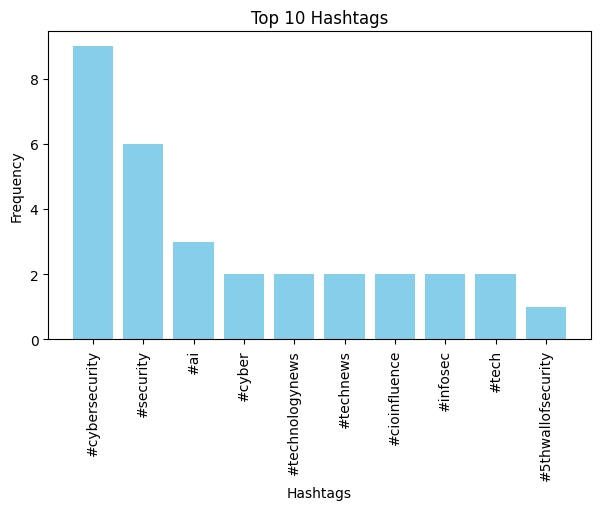

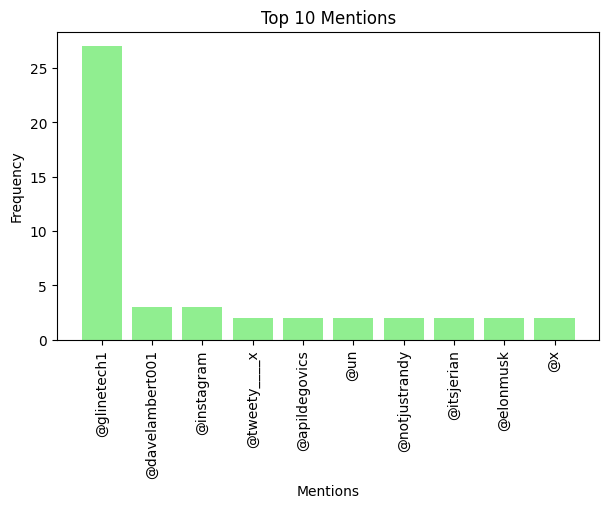

In [129]:
# Plotting Top Hashtags
top_hashtags = dict(hashtag_counts.most_common(10))
plt.figure(figsize=(7, 4))
plt.bar(top_hashtags.keys(), top_hashtags.values(), color='skyblue')
plt.title("Top 10 Hashtags")
plt.xticks(rotation=90)
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.show()

# Plotting Top Mentions
top_mentions = dict(mention_counts.most_common(10))
plt.figure(figsize=(7, 4))
plt.bar(top_mentions.keys(), top_mentions.values(), color='lightgreen')
plt.title("Top 10 Mentions")
plt.xticks(rotation=90)
plt.xlabel("Mentions")
plt.ylabel("Frequency")
plt.show()

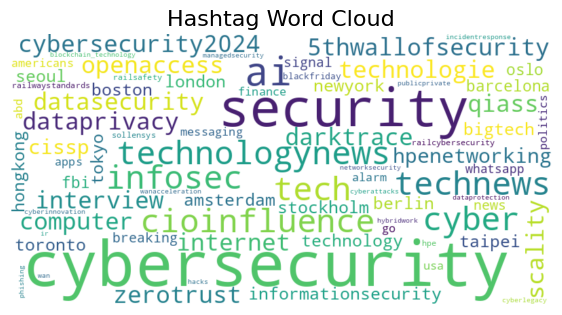

In [130]:
# wordcloud- Hashtags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_hashtags))
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Hashtag Word Cloud", fontsize=16)
plt.show()

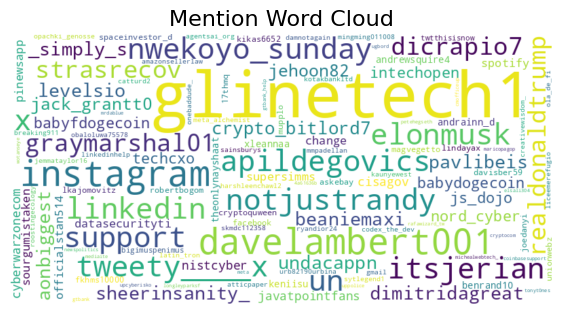

In [131]:
# Word Cloud- Mentions
wordcloud_mentions = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_mentions))
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud_mentions, interpolation='bilinear')
plt.axis("off")
plt.title("Mention Word Cloud", fontsize=16)
plt.show()

In [132]:
df['cleaned_text']

,cleaned_text
0,@aonbiggest @_simply_s this is fire cyber sec...
1,@undacappn @beaniemaxi reach out to @davelambe...
2,which is trickier staying on top of all the la...
3,@sheerinsanity_ hi \n\nyou can apply by using ...
4,towerwall is teaming up with a powerhouse pane...
...,...
95,@wotanseye @coinbasesupport not all hacker ste...
96,don t sleep on the issue yet \nmessage a cybe...
97,don t sleep on the issue yet \nmessage a cybe...
98,@realdonaldtrump cyber cult public private pu...


In [133]:
# For further testing, remove underscores, hashtags, and mentions
def preprocess_tweet(text):
  # Remove mentions (@username) and hashtags (#hashtag)
  text = re.sub(r'@\w+|#\w+', '', text)
  # Remove underscores
  text = re.sub(r'_', ' ', text)
  return text

# Apply the updated cleaning function to remove mentions and hashtags
df['cleaned_text'] = df['cleaned_text'].apply(preprocess_tweet)


In [134]:
df['cleaned_text']

,cleaned_text
0,this is fire cyber security is a great fiel...
1,reach out to with the proof of scam so they...
2,which is trickier staying on top of all the la...
3,hi \n\nyou can apply by using the online form...
4,towerwall is teaming up with a powerhouse pane...
...,...
95,not all hacker steal account i have a friend...
96,don t sleep on the issue yet \nmessage a cybe...
97,don t sleep on the issue yet \nmessage a cybe...
98,cyber cult public private push 3 5 \n\ntrum...


In [135]:
df['cleaned_text'].duplicated().sum()

27

In [136]:
# drop duplicated
df = df.drop_duplicates(subset='cleaned_text')

In [137]:
df.describe()

,author_id,retweet_count,like_count,reply_count
count,7.300000e+01,73.000000,73.000000,73.000000
mean,7.107862e+17,0.013699,0.178082,0.109589
std,7.698314e+17,0.117041,0.509424,0.355967
min,1.585646e+07,0.000000,0.000000,0.000000
25%,7.697378e+08,0.000000,0.000000,0.000000
50%,3.339627e+09,0.000000,0.000000,0.000000
75%,1.531261e+18,0.000000,0.000000,0.000000
max,1.863618e+18,1.000000,2.000000,2.000000


In [138]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [139]:
# tokenization
df['tokens']= df['cleaned_text'].apply(word_tokenize)

In [140]:
# stopwords removing
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [141]:
# lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [142]:
# saving cleaned data
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df.to_csv(cleaned_file_path, index=False)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [143]:
# from google.colab import drive
# drive.mount('/content/drive')

In [144]:
# import pandas as pd
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df = pd.read_csv(cleaned_file_path)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   created_at         73 non-null     object
 1   author_id          73 non-null     int64 
 2   text               73 non-null     object
 3   retweet_count      73 non-null     int64 
 4   like_count         73 non-null     int64 
 5   reply_count        73 non-null     int64 
 6   cleaned_text       73 non-null     object
 7   hashtags           73 non-null     object
 8   mentions           73 non-null     object
 9   tokens             73 non-null     object
 10  filtered_tokens    73 non-null     object
 11  lemmatized_tokens  73 non-null     object
dtypes: int64(4), object(8)
memory usage: 7.0+ KB


In [146]:
df.shape

(73, 12)

In [147]:
df['cleaned_text'].describe()

,cleaned_text
count,73
unique,73
top,this is fire cyber security is a great fiel...
freq,1


In [148]:
pip install emoji

In [149]:
import emoji

In [150]:
#
slang_dict ={
    "u": "you",
    "r": "are",
    "lol": "laugh out loud",
    "idk": "I don't know",
    "btw": "by the way",
    "omg": "oh my god",
    "brb": "be right back",
    "ty": "thank you",
    "np": "no problem",
    "smh": "shaking my head",
    "ive": "i have",
    "im": "i am"
}
# replace emojis with text
def replace_emojis(text):
  return emoji.demojize(text, delimiters=(" "," "))
# expand slang terms
def expand_slang(text, slang_dict):
  words = text.split()
  expanded_words = [slang_dict.get(word.lower, word) for word in words]
  return " ".join(expanded_words)

def advanced_cleaning(text):
  text = replace_emojis(text)
  text = expand_slang(text, slang_dict)
  return text
# updated df
df['cleaned_text_v2']= df['cleaned_text'].apply(advanced_cleaning)

In [151]:
print('DataFrame after advanced cleaning:')
print(df['cleaned_text_v2'])

DataFrame after advanced cleaning:
0     this is fire cyber security is a great field t...
1     reach out to with the proof of scam so they ca...
2     which is trickier staying on top of all the la...
3     hi you can apply by using the online form here co
4     towerwall is teaming up with a powerhouse pane...
                            ...                        
68    it fortifies security and safeguards against c...
69    not all hacker steal account i have a friend w...
70    hi tony we can confirm our cyber security page...
71    cyber cult public private push 3 5 trump admin...
72    dear respected yogi ji greetings of the day st...
Name: cleaned_text_v2, Length: 73, dtype: object


Word frequency analysis

Analysing most frequently used words

In [152]:
from collections import Counter

In [153]:

all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('cyber', 74), ('and', 65), ('security', 62), ('to', 58), ('the', 56), ('a', 48), ('you', 38), ('your', 32), ('i', 30), ('in', 28), ('of', 28), ('for', 26), ('s', 23), ('with', 22), ('they', 22), ('help', 19), ('on', 18), ('is', 15), ('account', 15), ('will', 14)]


In [154]:
import matplotlib.pyplot as plt

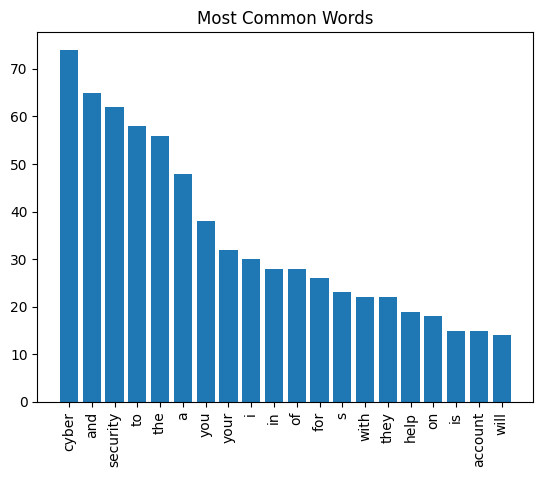

In [155]:
# visualizing the word freq
words, counts=zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Most Common Words")
plt.show()

In [156]:
from wordcloud import WordCloud

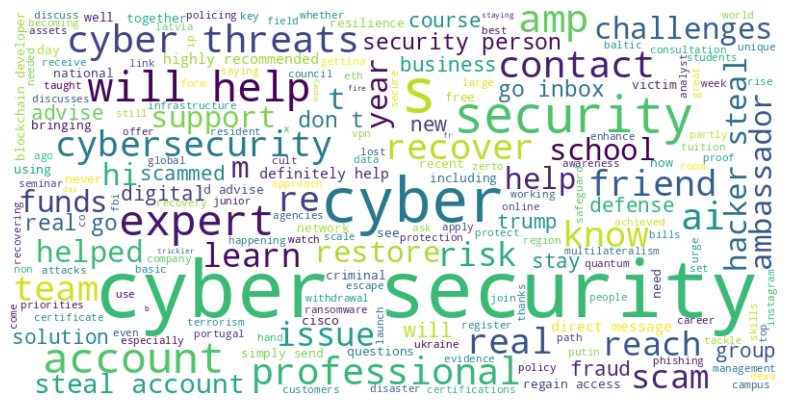

In [157]:
wordcloud = WordCloud(width=800, height = 400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [158]:
from textblob import TextBlob

In [159]:
# sentiment analysis
def analyze_sentiment(text):
  # Create a TextBlob object
  blob = TextBlob(text)
  # Get polarity score
  polarity = blob.sentiment.polarity
  # Classify sentiment
  if polarity > 0:
    sentiment = "Positive"
  elif polarity == 0:
    sentiment = "Neutral"
  else:
    sentiment = "Negative"
  return sentiment, polarity

# Apply sentiment analysis to the cleaned_text_v2 column
df[["Sentiment", "Polarity"]] = df["cleaned_text_v2"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

In [160]:
#
print('DataFrame after sentiment analysis:')
print(df[['cleaned_text_v2', 'Sentiment', 'Polarity']].head())

DataFrame after sentiment analysis:
                                     cleaned_text_v2 Sentiment  Polarity
0  this is fire cyber security is a great field t...  Positive       0.8
1  reach out to with the proof of scam so they ca...   Neutral       0.0
2  which is trickier staying on top of all the la...  Positive       0.5
3  hi you can apply by using the online form here co   Neutral       0.0
4  towerwall is teaming up with a powerhouse pane...   Neutral       0.0


In [161]:
import seaborn as sns

<ipython-input-162-0ab02f77c7e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="viridis")


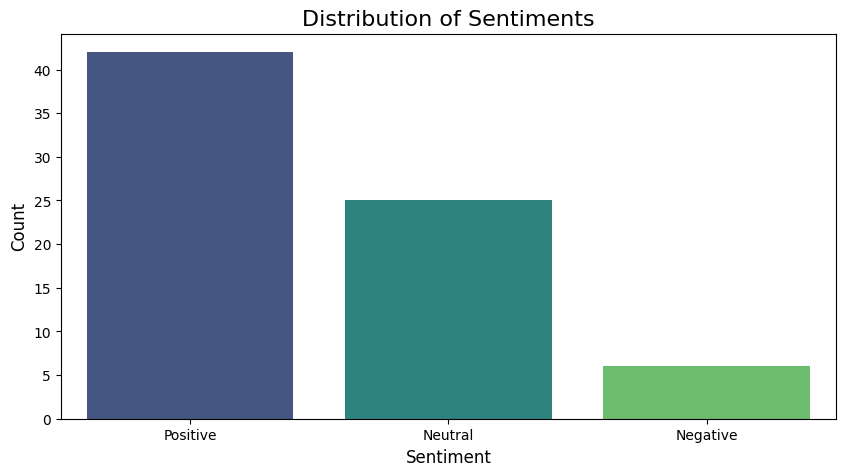

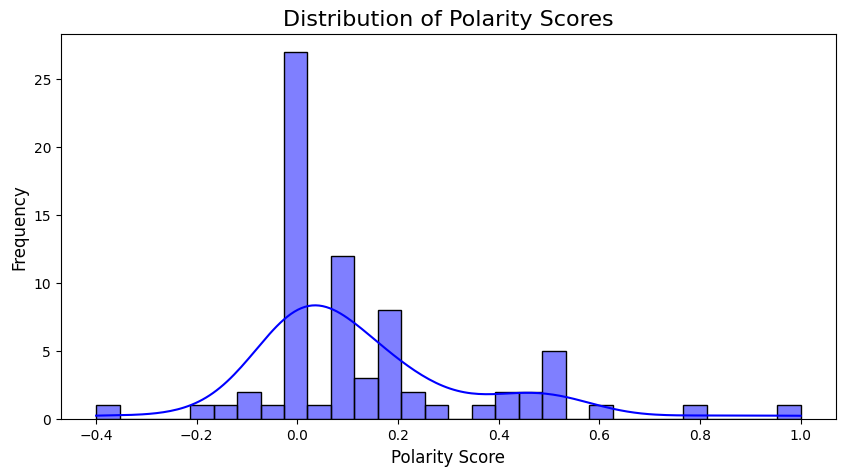

In [162]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Sentiment", palette="viridis")
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# polarity distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Polarity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Polarity Scores", fontsize=16)
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Named Entity Recognition**

In [163]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [164]:
def extract_entities(text):
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities
df['Entities'] = df['cleaned_text_v2'].apply(extract_entities)

In [165]:
df.duplicated(['cleaned_text_v2']).sum()

8

In [166]:
# entity type freq
from collections import Counter
# flatten list of entities
all_entities = [label for entities in df['Entities'] for _, label in entities]

In [167]:
entity_counts = Counter(all_entities)

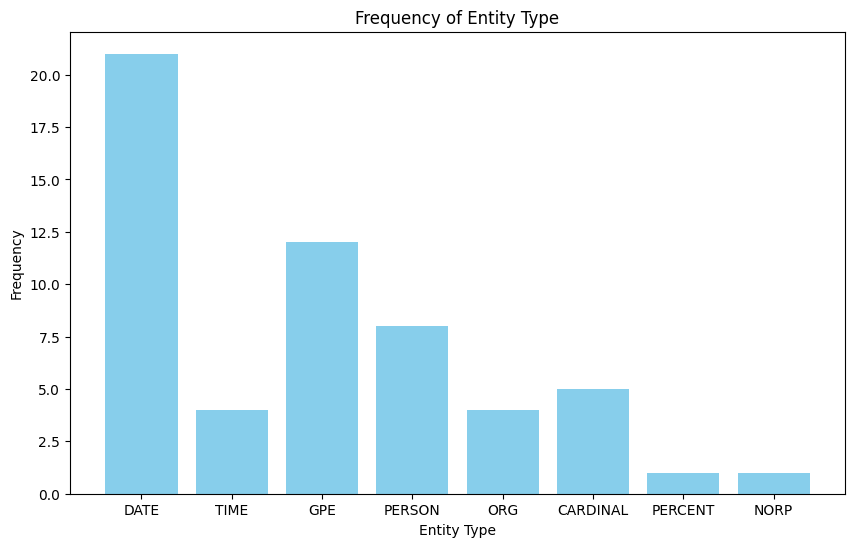

In [168]:
# ploting entities type
plt.figure(figsize=(10,6))
plt.bar(entity_counts.keys(), entity_counts.values(),color='skyblue')
plt.title('Frequency of Entity Type')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()

In [169]:
# seperate column for each entity types
entity_types = ['PERSON', 'ORG', 'NORP', 'CARDINAL', 'ORDINAL', 'TIME', 'GPE', 'DATE']
for etype in entity_types:
  df[etype] = df['Entities'].apply(lambda entities: [ent for ent, label in entities if label == etype])

In [170]:
org_mentions = df[df['ORG'].apply(len)>0]
print(org_mentions[['cleaned_text_v2','ORG']])

                                      cleaned_text_v2              ORG
12  cybersecurity in 2024 the top 10 cyber attacks...  [cybersecurity]
30  stay ahead of cyber threats cisa and the fbi j...            [fbi]
34  fbi urges americans to adopt encrypted messagi...            [fbi]
41  the cyber awareness behaviour and culture team...        [cosford]


Entity Realtionship Visualization

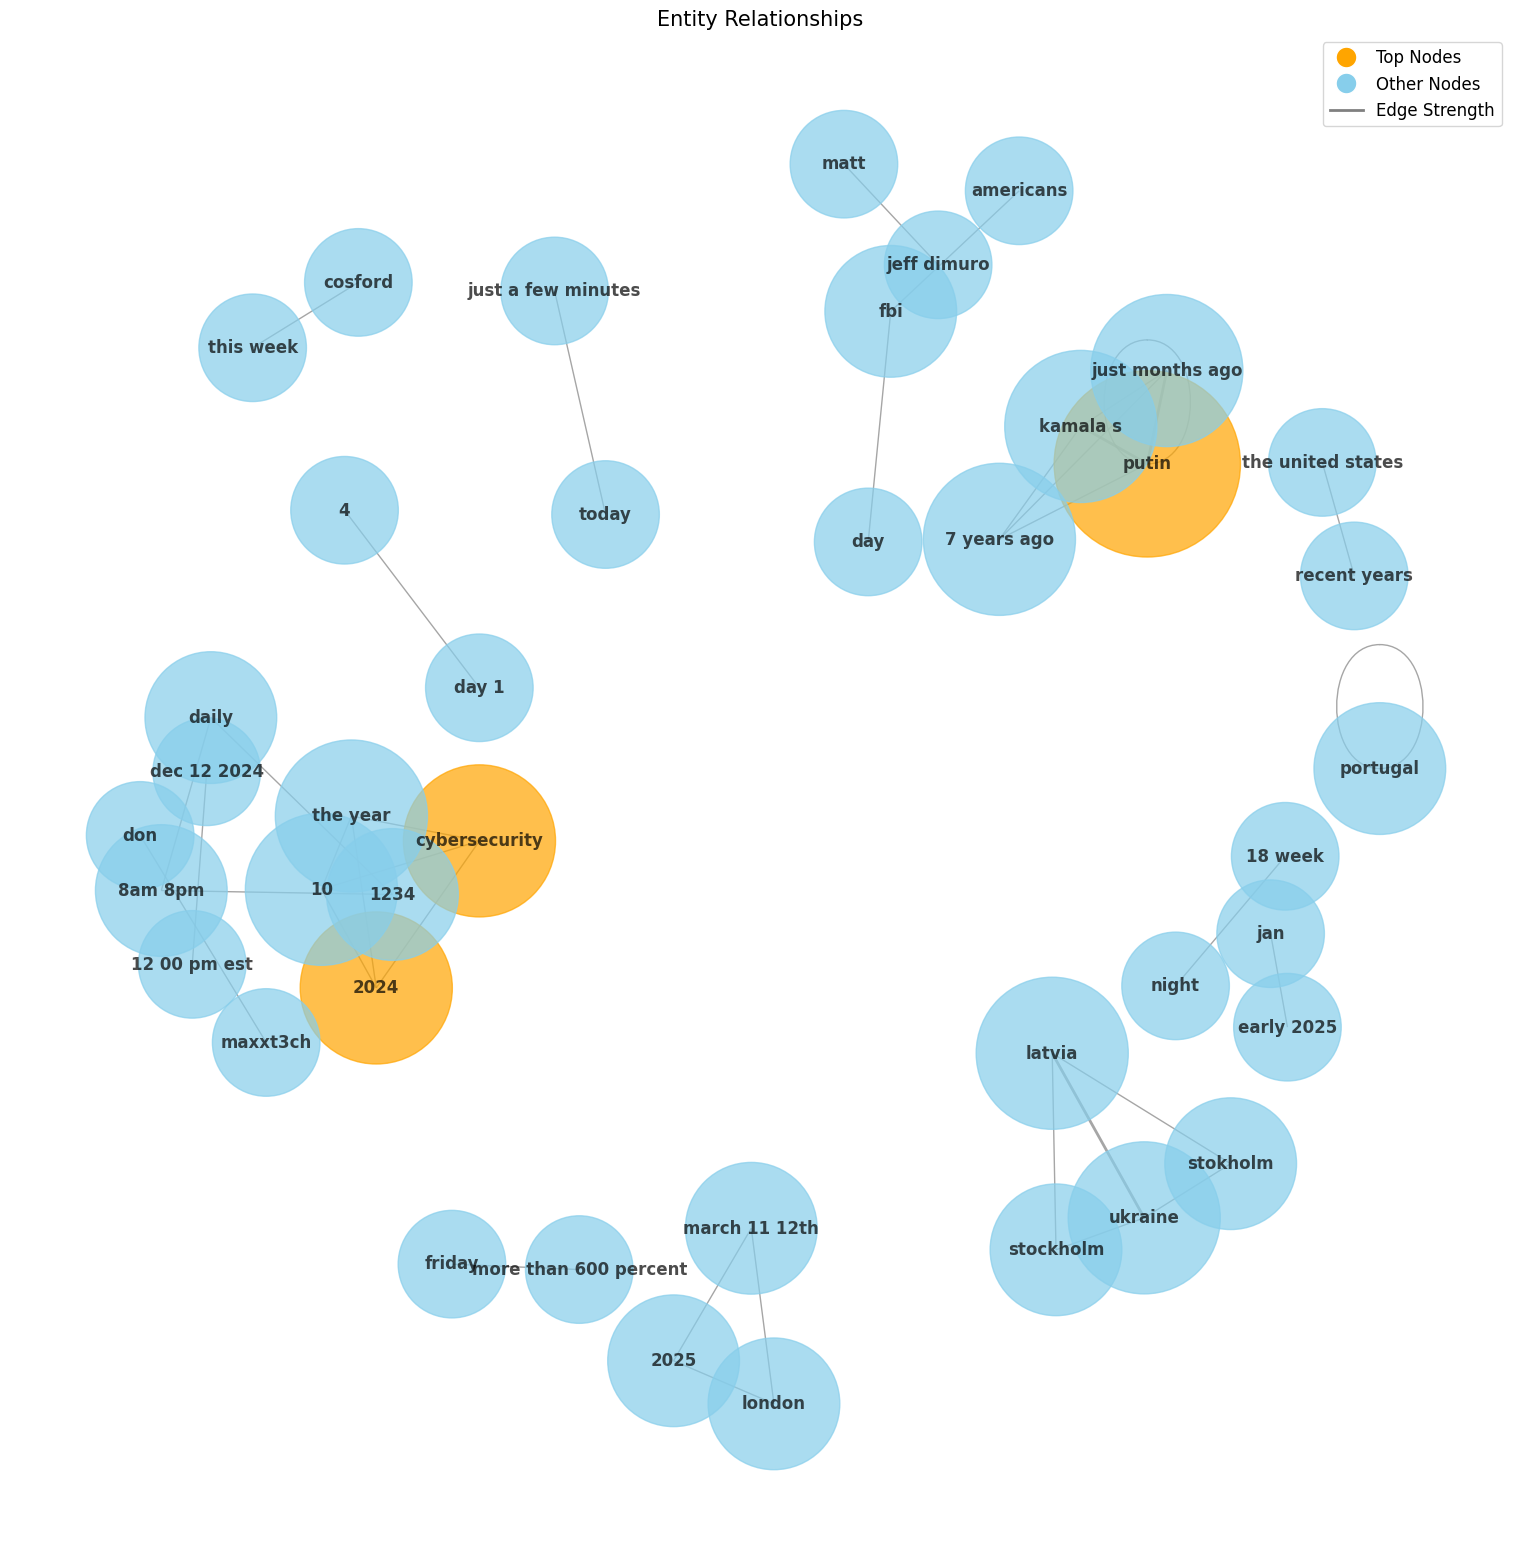

In [171]:
import networkx as nx
from matplotlib.lines import Line2D

# create a graph
G = nx.Graph()

# adding edges for entities in each tweet
edge_weights = Counter()
for entities in df['Entities']:
  entity_names = [entity[0] for entity in entities]
  for i in range(len(entity_names)):
    for j in range(i+1, len(entity_names)):
      edge_weights[(entity_names[i], entity_names[j])] += 1

# adding edges to the graph with weights
for (entity1, entity2), weight in edge_weights.items():
  G.add_edge(entity1, entity2, weight=weight)

# spring layout for better spacing
pos = nx.spring_layout(G, k=0.5)
node_sizes = [3000 * (G.degree(node)+1) for node in G.nodes]
edge_widths = [d['weight'] for (_, _, d) in G.edges(data=True)]

# Highlighting top 3 connected nodes
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:3]
top_nodes = [node for node, degree in top_nodes]
# Assigning colors
node_colors = ['orange' if node in top_nodes else 'skyblue' for node in G.nodes]


# graph ploting
plt.figure(figsize=(15,15))
nx.draw(G,
        pos,
        with_labels=True,
        node_color=node_colors,
        font_size = 12,
        font_weight='bold',
        node_size=node_sizes,
        edge_color='gray', width = edge_widths, alpha=0.7)

# adding a legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Top Nodes', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Other Nodes', markerfacecolor='skyblue', markersize=15),
    Line2D([0], [0], color='gray', lw=2, label='Edge Strength'),
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
plt.title('Entity Relationships',fontsize=15)
plt.show()

In [61]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import random
def synonym_repalcement(sentence, n=1):
  words = sentence.split()
  new_words = words.copy()
  random_words = list(set(words))
  random.shuffle(random_words)
  num_replaced = 0

  for word in random_words:
    synonyms = wordnet.synsets(word)
    if synonyms:
      synonym = random.choice(synonyms).lemmas()[0].name()
      new_words = [synonym if w == word else w for w in new_words]
      num_replaced += 1
    if num_replaced >= n:
      break
  return ' '.join(new_words)

df['Augmented_Text'] = df['cleaned_text_v2'].apply(lambda x: synonym_repalcement(x, n=2))
df[['cleaned_text_v2', 'Augmented_Text']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_text_v2,Augmented_Text
0,this is fire cyber security is a great field t...,this be fire cyber security be a great field t...
1,reach out to with the proof of scam so they ca...,reach out to with the proofread of scam so the...
2,which is trickier staying on top of all the la...,which is trickier bide on top of all the lates...
3,hi you can apply by using the online form here co,hi you can use by using the online form here c...
4,towerwall is teaming up with a powerhouse pane...,towerwall is teaming up with a powerhouse pane...


In [62]:
# saving cleaned data
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df.to_csv(cleaned_file_path, index=False)

In [64]:
# from google.colab import files
# files.download(cleaned_file_path)

**TRANSFORM**

In [65]:
df.drop(df.columns[[3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
df.head()

,created_at,author_id,text,Sentiment,Polarity,Augmented_Text
0,2024-12-04T15:39:45.000Z,3000803682,"@AONBIGGEST @_simply_s this is fire, cyber sec...",Positive,0.8,this be fire cyber security be a great field t...
1,2024-12-04T15:39:38.000Z,2149512421,@undacappn @beaniemaxi Reach out to @Davelambe...,Neutral,0.0,reach out to with the proofread of scam so the...
2,2024-12-04T15:37:38.000Z,729807995937263617,Which is trickier—staying on top of all the la...,Positive,0.5,which is trickier bide on top of all the lates...
3,2024-12-04T15:36:25.000Z,47319664,"@SheerInsanity_ Hi,\n\nYou can apply by using ...",Neutral,0.0,hi you can use by using the online form here c...
4,2024-12-04T15:35:34.000Z,36082475,Towerwall is teaming up with a powerhouse pane...,Neutral,0.0,towerwall is teaming up with a powerhouse pane...


In [86]:
# unit text 1: verify augmented text
def test_augmented_text(df):
  for original, augmented in zip(df['text'], df['Augmented_Text']):
    assert augmented != "", f"Augmented_Text is empty for: {original}"
    assert augmented != original, f"No transformation occurred for: {original}"
  print("Test 1 passed: Augmented_Text transformations are valid.")

In [87]:
test_augmented_text(df)

Test 1 passed: Augmented_Text transformations are valid.


In [88]:
def test_sentiment_polarity(df):
  for text, sentiment, polarity in zip(df['text'], df['Sentiment'], df['Polarity']):
    if polarity >0:
      assert sentiment == "Positive", f"Mismatch: {text} has polarity {polarity} but sentiment {sentiment}"
    elif polarity < 0:
      assert sentiment == "Negative", f"Mismatch: {text} has polarity {polarity} but sentiment {sentiment}"
    else:
      assert sentiment == "Neutral", f"Mismatch: {text} has polarity {polarity} but sentiment {sentiment}"
  print("Test 2 passed: Sentiment and Polarity match.")

In [89]:
test_sentiment_polarity(df)

Test 2 passed: Sentiment and Polarity match.


**Storing Data in SQLite Database**



*  Database name: TwiPipeline
*  Table name: Tweets
* Stored the df in SQLite db, overwriting existing data
* verified the table schema and data integrirty
* Confirnmed data were correctly saved



In [90]:
import sqlite3

In [91]:
def setup_sqlite(df, db_name='TwiPipeline.db', table_name='tweets'):
  conn = sqlite3.connect(db_name)
  print(f"Connected to SQLite database: {db_name}")
  df.to_sql(table_name, conn, if_exists='replace', index=False)

  print(f"DataFrame successfully saved to table '{table_name}' in database '{db_name}'.")
  conn.close()
  print("SQLite connection closed.")

In [92]:
setup_sqlite(df)

Connected to SQLite database: TwiPipeline.db
DataFrame successfully saved to table 'tweets' in database 'TwiPipeline.db'.
SQLite connection closed.


In [99]:
# verifying data integrity
def test_sqlite_loading(df, db_name='TwiPipeline.db', table_name='tweets'):
  conn = sqlite3.connect(db_name)
  # checking if table exists
  cursor = conn.cursor()
  cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}';")
  assert cursor.fetchone(), f"Table '{table_name}' does not exist in database '{db_name}'."

  result_df = pd.read_sql(f"SELECT * FROM {table_name};", conn) #fetching data from db

  assert len(result_df) == len(df), "Row count mismatch between DataFrame and SQLite table."

  conn.close()
  print("Integration Test passed: Data successfully loaded into SQLite.")

In [100]:
setup_sqlite(df)  # Save the DataFrame to SQLite
test_sqlite_loading(df)  # Run integration test

Connected to SQLite database: TwiPipeline.db
DataFrame successfully saved to table 'tweets' in database 'TwiPipeline.db'.
SQLite connection closed.
Integration Test passed: Data successfully loaded into SQLite.


In [113]:
conn = sqlite3.connect('TwiPipeline.db')
result = pd.read_sql('SELECT * FROM tweets', conn)
print(result.head())
conn.close

                 created_at           author_id  \
0  2024-12-04T15:39:45.000Z          3000803682   
1  2024-12-04T15:39:38.000Z          2149512421   
2  2024-12-04T15:37:38.000Z  729807995937263617   
3  2024-12-04T15:36:25.000Z            47319664   
4  2024-12-04T15:35:34.000Z            36082475   

                                                text Sentiment  Polarity  \
0  @AONBIGGEST @_simply_s this is fire, cyber sec...  Positive       0.8   
1  @undacappn @beaniemaxi Reach out to @Davelambe...   Neutral       0.0   
2  Which is trickier—staying on top of all the la...  Positive       0.5   
3  @SheerInsanity_ Hi,\n\nYou can apply by using ...   Neutral       0.0   
4  Towerwall is teaming up with a powerhouse pane...   Neutral       0.0   

                                      Augmented_Text  
0  this be fire cyber security be a great field t...  
1  reach out to with the proofread of scam so the...  
2  which is trickier bide on top of all the lates...  
3  hi you can us

<function Connection.close()>

* Built a pipeline to acquire, preprocess, and analyze Twitter data.
* Successfully stored processed data in a SQLite database for structured querying.
* Validated the pipeline with unit and integration tests, ensuring reliability.






